Whether it be to the screen, to a file, or to another computer across a network, all useful programs perform output of some sort or another.

Most programs also require some form of input

As is the case with many other modern programming languages, input and output are not directly supported by C

Instead input/output (I/O) is handled by a set of standard library functions that extend the base language.

In this chapter, we will discuss several functions in the C standard library that support simple I/O.

## 18.2 The C Standard Library 
The standard library is intended to be a repository of useful, primitive functions that serve as components for building complex software

The library's functions are typically written by designers of the compiler and operating system, and on many occasions they are optimized for the system
on which they are installed. 

To use a function defined within the C standard library, we must include the appropriate header file (.h file).

- A library header file does not contain the source code for library functions. 
- If the header files do not contain source code, how does the machine code for, say, print f get added to our programs? 
- Each library function called within a program is linked in when the executable image is formed
- The object files containing the library functions are stored somewhere on the system and are accessed by the linker, which links together the various function binaries into a single executable program.

## 18.3 I/O, One Character at a Time 
We'll start by examining two of the simplest I/O functions provided by the C library.

The functions `getchar` and `putchar` perform input and output on a single character at a time.

Input is read in as ASCII and output is written out as ASCII, in a manner similar to the IN and OUT TRAP routines of the LC-3

### 18.3.1 I/O Streams 
Conceptually, all character-based input and output is performed on **streams**

- The sequence of ASCII characters typed by the user at the keyboard is an example of an input stream. As each character is typed, it is added to the end of the stream
- Whenever a program reads keyboard input, it reads from the beginning of the stream.
- The sequence of ASCII characters printed by a program, similarly, is added to the end of the output stream

In other words, this stream abstraction allows us to further decouple the producer from the consumer, which is helpful because the two are usually operating at different rates

**Eg:** if a program wants to perform some output, it adds characters to the end of the output stream without being required to wait for the output device to finish displaying the previous character

In C the standard input stream is referred to as `stdin` and is mapped to the keyboard by default. The standard output stream is referred to as `stdout` and is mapped by default to the display. The functions `getchar` and `putchar` operate on these two streams.

### 18.3.2 putchar 
The function `putchar` is the high-level language equivalent of the LC-3 `OUT` TRAP routine.
- displays on the stdout output stream the ASCII value of the parameter passed to it
- It performs no type conversions—the value passed to it is assumed to be ASCII and is added directly to the output stream

All the calls to putchar in the following code segment cause the same character (lowercase h) to be displayed

    char c = 'h';
    ...
    putchar(c);
    putchar('h');
    putchar(104);

### 18.3.3 getchar 
The function `getchar` is the high-level language equivalent of the LC-3 `IN` TRAP function.

It returns the ASCII value of the next input character appearing in the `stdin` input stream

By default, the stdin input stream is simply the stream of characters typed at the keyboard

In the following code segment, getchar returns the ASCII value of the next character typed at the keyboard. This return value is assigned to the variable c.

    char c;
    c = getchar();

### 18.3.4 Buffered I/O 
On most computer systems, I/O streams are buffered

**Every key typed on the keyboard is captured by the low-level operating system software and kept in a buffer which is a small array, until it is released into the input stream**

In the case of the input stream, the buffer is released when the user presses Enter.

So in the example in Figure 18.1, if the user types the character A and presses Enter, the variable inChar i will equal the ASCII value of A (which is 65) and the variable inchar2 will equal the ASCII value of newline (which is 10).

There is a good reason for buffering, particularly for keyboard input: Pressing the Enter key allows the user to confirm the input. Say you mistyped some input and wanted to correct it before the program detects it. You can edit what you type using the backspace and delete keys, and then confirm your input by pressing Enter.

The output stream is similarly buffered. Observe by running the program in Figure 18.2.

We say that the putchar ('\n') causes output to be flushed.

Despite the slightly complex behavior of buffered I/O streams, the underlying mechanism used to make this happen are the IN and OUT TRAP routines

The buffering of streams is accomplished by extra layers of software surrounding the IN and OUT service routines.

## 18.4 Formatted I/O 
The functions putchar and getchar suffice for simple I/O tasks but are cumbersome for performing non-ASCII I/O. The functions printf and scanf perform
more sophisticated formatted I/O, and they are designed to more conveniently
handle I/O of integer and floating point values.

### 18.4.1 printf 
The function printf writes formatted text to the output stream. Using printf,
we can print out ASCII text embedded with values generated by the running
program.

The printf function takes care of all the type conversions necessary for this to occur.

Embedded within the format string are zero or more **conversion specifications** - The conversion specifications indicate how to print out any of the parameters that follow the format string in the function call. Conversion specifications all begin with a `%` character

### 18.4.2 scanf 
**Purpose**

- The `scanf` function reads formatted ASCII data from the input stream.
- It requires a format string as the first argument and pointers to variables for subsequent arguments.

**Behavior**

- Format strings for `scanf` are similar to `printf` but must contain conversion specifications to read values.
- Arguments following the format string must be pointers to allow `scanf` to assign values directly in memory.
- Matches plain text in the format string with the input stream, e.g., separators like `/` must be present in input.


### 18.4.3 Variable Argument Lists 
`printf("Char %c.\t String %s\n Float %f\n", c, banner, pi);`

The format string contains three format specifications; therefore, three arguments follow it in the function call. The %c spec in the string is associated with the first argument that follows (the variable c). The %s is associated with banner, and %f with pi. 

There are three values to be printed; therefore, this call contains four arguments altogether. If we want to print five values, the function call contains six arguments. 

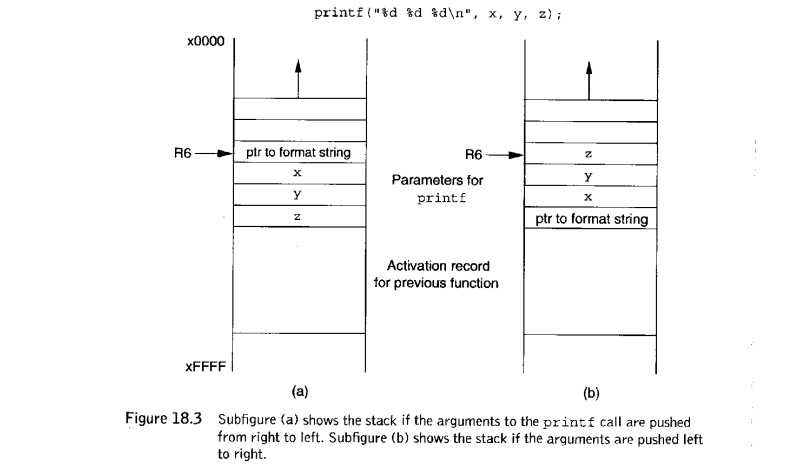



## 18.5 I/O from Files 
Say we wanted to process a large set of data, such as the daily closing price of IBM stock for the last 20 years. To ask the user to type this via keyboard would render it very "user-unfriendly." Instead, we would want the program to read the data off a file on disk, and possibly write its output to disk

**I/O in C is based on streams, as we described earlier, and these streams are conceptually all bound to files.**

That is, the functions printf and scanf are in actuality special cases of more
general-purpose C I/O functions. These two functions operate specifically on two
special files called stdin and stdout. In C, stdin and stdout are mapped by
default to the keyboard and the display.

The general-purpose version of printf is called `fprintf`, and the general purpose version of scanf is called `fscanf`. The functions `fprintf` and `fscanf` work like their counterparts, with the main difference being that they allow us to specify the stream on which they act. For example, we can inform fprintf to write its output to a specific file on disk.

**Before we can perform file I/O, we need to declare a file pointer for each file we want to manipulate.**
Typically, files are stored on the file system of the computer system. In C, we can declare a file pointer called inf ile as follows: `FILE *infile;`

Here we are declaring a pointer to something of type FILE. The type FILE is defined within the header file stdio.h

Once the file pointer is declared, we need to map it to a file on the computer's file system. The C library call fopen performs this mapping. 
Each fopen call requires two arguments: the name of the file to open and the description of what type of operation the we want to perform on the file. To follow is an example.

    FILE *infile;
    infile = fopen("ibm_stock_prices", "r");

- If the fopen call is successful, the function returns a file pointer to the physical file
- If the open for some reason fails (such as the file could not be found), then the function returns a null pointer.
Recall that a null pointer is an invalid pointer that has the value NULL.

It is always good practice to check if the fopen call was successful.

    FILE *infile;
    infile = fopen("ibm_stock_prices", "r");
    if (infile == NULL)
        printf("fopen unsuccessful!\n"); 

Now with the file pointer properly mapped to a physical file, we can use fscanf and fprintf to read and write it just as we used printf and scanf to read the standard devices
- The functions f scanf and fprintf both require a file pointer as their first argument to indicate on which stream the operations are to be performed

Here, we are reading from an ASCII text file called ibm stock prices and writing to a file called buy hold or sell:

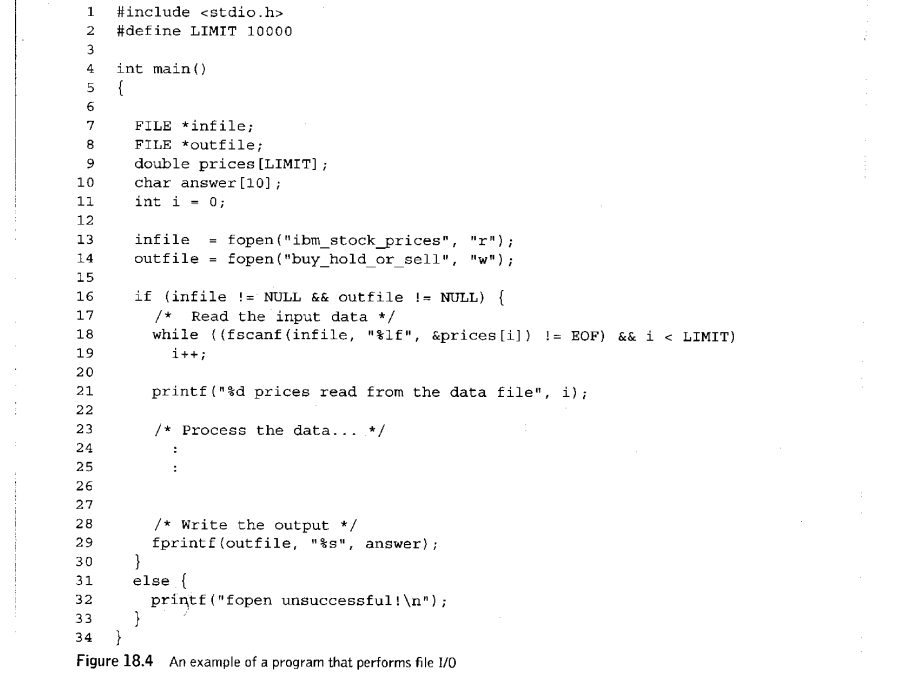

The f scanf function returns
a special value when no more data can be read from the input file, indicating the
end of file has been reached. We can check the return value of f scanf against this
special character, which is defined to the preprocessor macro EOF. The condition
on the while loop causes it to terminate if EOF is encountered or if the limit of
input values is exceeded. After reading the input file, the program processes the
input data, and the output file is written with the value of the string answer. 

**The function printf is equivalent to calling fprintf using stdout as the file pointer. Likewise, scanf is equivalent to calling fscanf using stdin**

## 18.6 Summary

This chapter explored C's facilities for input and output (I/O), highlighting its reliance on standard library functions rather than direct language support. Key takeaways include:

##### Key Concepts

- **Input and Output on Streams**: 
  - I/O is performed on streams, an abstraction where data flows between a producer (adding data) and a consumer (reading data).
  - Streams enable producers and consumers to operate independently, without waiting for each other.

- **Four Basic I/O Functions**:
  - **putchar** and **getchar**: For character-level I/O.
  - **printf** and **scanf**: For formatted I/O, utilizing variable argument lists. The LC-3 calling convention simplifies handling these arguments by pushing them onto the stack in the right-to-left order.

- **File I/O**:
  - C treats all I/O as file-based, where **printf** and **scanf** are specialized cases for standard input/output.
  - Functions like **fprintf** and **fscanf** allow I/O on specific files by using file pointers.
  - Files are bound to file pointers via the **fopen** function.
